# Пользовательские настройки легенд на графиках

Большая понятность графика обеспечивается заданием меток для различных элементов графика. Мы ранее уже рассматривали создание простой легенды, здесь продемонстрируем возможности пользовательской настройки расположения и внешнего вида легенд в Matplotlib.

С помощью команды plt.legend() можно автоматически создать простейшую легенду для любых маркированных элементов графика:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

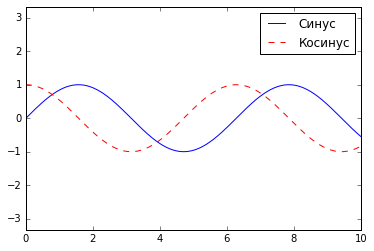

In [3]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Синус')
ax.plot(x, np.cos(x), '--r', label='Косинус')
ax.axis('equal')
leg = ax.legend();

Существует множество вариантов пользовательских настроек такого графика, которые могут нам понадобиться. Например, можно задать местоположение легенды и отключить рамку :

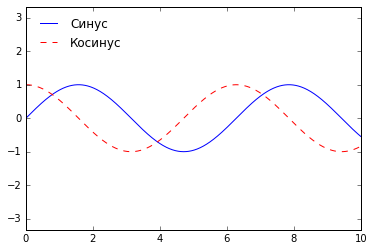

In [4]:
ax.legend(loc='upper left', frameon=False)
fig

Можно также воспользоваться командой ncol, чтобы задать количество столбцов в легенде:

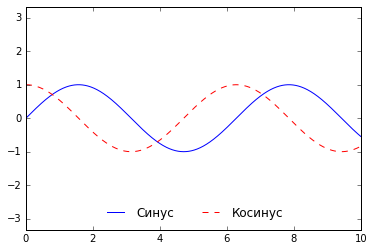

In [5]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

Можно использовать для легенды скругленную прямоугольную рамку (fancybox) или добавить тень, поменять прозрачность (альфа-фактор) рамки или поля около текста:

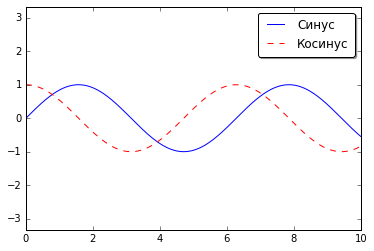

In [6]:
ax.legend(fancybox=True, shadow=True, borderpad=0.5, framealpha=1)
fig

Дополнительную информацию об имеющихся настройках для легенд можно получить в docstring функции plt.legend.

## Выбор элементов для легенды

По умолчанию легенда включает все маркированные элементы. Если нам этого не нужно, можно указать, какие элементы и метки должны присутствовать в легенде, воспользовавшись объектами, возвращаемыми командами построения графика. Команда plt.plot() умеет рисовать за один вызов несколько линий и возвращать список созданных экземпляров линий. Для указания, какие элементы использовать, достаточно передать какие-либо из них функции plt.legend() вместе с задаваемыми метками:

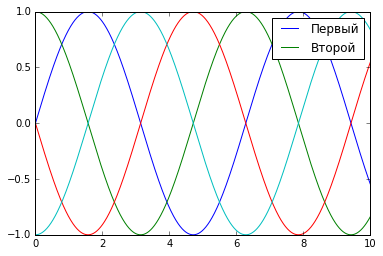

In [7]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines представляет собой список экземпляров класса plt.line2D
plt.legend(lines[:2], ['Первый', 'Второй']);

Обычно на практике мне удобнее использовать первый способ, указывая метки непосредственно для элементов, которые нужно отображать в легенде:

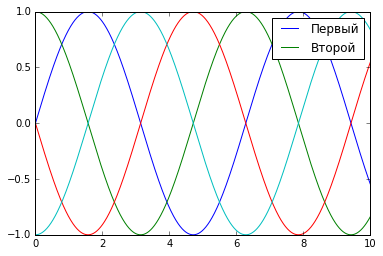

In [8]:
plt.plot(x, y[:, 0], label='Первый')
plt.plot(x, y[:, 1], label='Второй')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

Обратите внимание, что по умолчанию в легенде игнорируются все элементы, для которых не установлен атрибут label.

## Задание легенды для точек различного размера

Иногда возможностей легенды по умолчанию недостаточно для нашего графика. Допустим, вы используете точки различного размера для визуализации определенных признаков данных и хотели бы создать отражающую это легенду. Вот пример, в котором мы будем отражать население городов Калифорнии с помощью размера точек. Нам нужна легенда со шкалой размеров точек, и мы создадим ее путем вывода на графике маркированных данных без самих меток

In [9]:
import pandas as pd
cities = pd.read_csv('CSV\california_cities.csv')

In [10]:
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [11]:
# Извлекаем интересующие нас данные
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

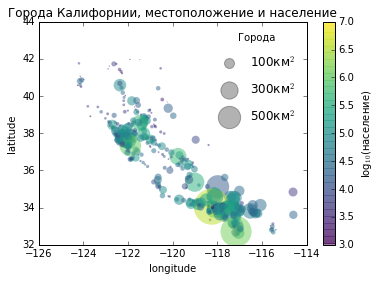

In [12]:
# Распределяем точки по нужным местам
# c использованием размера и цвета

plt.scatter(lon, lat, label=None, c=np.log10(population), cmap='viridis', s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(население)')
plt.clim(3, 7)

# Создаем легенду:
# выводим на график пустые списки с нужным размером и меткой
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + 'км$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Города')
plt.title('Города Калифорнии, местоположение и население');

Легенда всегда относится к какому-либо находящемуся на графике объекту, поэтому, если нам нужно отобразить объект конкретного вида, необходимо сначала его нарисовать на графике. В данном случае нужных нам объектов (кругов серого цвета) на графике нет, поэтому идем на хитрость и выводим на график пустые списки. Обратите внимание, что в легенде перечислены только те элементы графика, для которых задана метка.

Мы создали посредством вывода на график пустых списков маркированные объекты, которые затем собираются в легенде. Теперь легенда дает нам полезную информацию. Эту стратегию можно использовать для создания и более сложных визуализаций.

Обратите внимание, что в случае подобных географических данных график стал бы понятнее при отображении на нем границ штата и других картографических элементов. Отличный инструмент для этой цели — дополнительный набор утилит Basemap для библиотеки Matplotlib, который мы рассмотрим в разделе «Отображение географических данных с помощью Basemap» данной главы.

## Отображение нескольких легенд 

Иногда при построении графика необходимо добавить на него несколько легенд для одной и той же системы координат. К сожалению, библиотека Matplotlib не сильно упрощает эту задачу: используя стандартный интерфейс legend, можно создавать только одну легенду для всего графика. Если попытаться создать вторую легенду с помощью функций plt.legend() и ax.legend(), она просто перекроет первую. Решить эту проблему можно, создав изначально для легенды новый рисователь (artist), после чего добавить вручную второй рисователь на график с помощью низкоуровневого метода ax.add_artist():

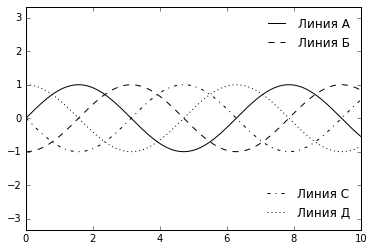

In [13]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')
ax.axis('equal')

# Задаем линии и метки первой легенды
ax.legend(lines[:2], ['Линия A', 'Линия Б'], loc='upper right', frameon=False)

# Создаем вторую легенду и добавляем рисователь вручную
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['Линия С', 'Линия Д'], loc='lower right', frameon=False)
ax.add_artist(leg);

Мы мельком рассмотрели низкоуровневые объекты рисования, из которых состоит любой график библиотеки Matplotlib. Если вы заглянете в исходный код метода ax.legend() (напомню, что сделать это можно в блокноте оболочки IPython с помощью команды legend??), то увидите, что эта функция состоит просто из логики создания подходящего рисователя Legend, сохраняемого затем в атрибуте legend_ и добавляемого к рисунку при отрисовке графика.